# **Estadística inferencial.**

## Introducción
La **Estadística Inferencial** es la rama de la estadística que permite hacer **conclusiones sobre una población** a partir de la información obtenida de una muestra.  
Mientras que la estadística descriptiva se enfoca en resumir y organizar los datos, la inferencial busca **estimar parámetros desconocidos** y realizar **pruebas de hipótesis** con un cierto nivel de confianza.

Un elemento central en este proceso son los **estimadores**, que son funciones de los datos muestrales usadas para aproximar parámetros poblacionales (como la media, la varianza o una proporción).  
Los estimadores se evalúan según propiedades deseables, tales como:

- **Insesgadez**: el estimador reproduce en promedio el valor real del parámetro.  
- **Consistencia**: al aumentar el tamaño de la muestra, el estimador converge al valor real.  
- **Eficiencia**: entre dos estimadores insesgados, se prefiere aquel con menor varianza.  

Existen diferentes métodos para obtener estimadores. Los más utilizados son:  

- **Método de momentos**, que iguala momentos muestrales con momentos poblacionales.  
- **Máxima verosimilitud (EMV)**, que elige los parámetros que maximizan la probabilidad de observar los datos.  

Una vez obtenidos los estimadores, la inferencia no se limita a un solo valor, sino que también se utilizan **intervalos de confianza**. Estos proporcionan un rango de valores plausibles para el parámetro poblacional con un nivel de confianza dado (por ejemplo, 95%).  



### Definiciones.
- **Espacio parametral**. Es el conjunto de todos los pisbles valores de un parámetro de distribución de probabilida y se le denota por la letar $\Theta$.
- **Muesta Aleatoria.** Es una colección de variables aleatorias $X_1,\cdots,X_n$ que son independientes e identicamente distribuidas.
- **Estadística.** Es una función de una muetsra aleatoria que no depende de parámetros desconocidos.
- **Estimado Puntual.** Para un parámetro desconocido $\theta$ es una estadística denotada por $\hat{\theta}$ que se propone estimar el parámetro.

## Insesgamiento.
Un estimador $\hat\theta$ es **insesgado** para el parámetro $\theta$ si cumple la condición $$\mathbb{E}(\hat\theta)=\theta$$
Esta es una buena propiedad para un estimador, pues siendo un estimador una variable aleatoria, y si su objetivo es estimar el valor del parámetro,
entonces es alentador saber que su valor promedio es justamente el valor a
estimar.

## Consistencia
Sean $\hat\theta_n$ un estimador para $\theta$ basadi en una muestra aleatoria de tamaño $n$. Se dice que $\hat\theta_n$ es **consistente** para $\theta$ si $\hat\theta_n\rightarrow \theta$ es probabilidad, cuando $n\rightarrow \infty$. Esto es , para cualquier $\epsilon>0$,
$$\lim\limits_{n \to \infty}\mathbb{P}(|\hat\theta-\theta|>\epsilon)=0$$
Esta propiedad establece la convergencia en probabilidad del estimador
al parámetro a estimar cuando el tamaño de la muestra crece a infinito.

## Eficiencia
Sean $\hat\theta_1$ y $\hat\theta_2$ dos estimadores insesgados para un parámetro $\theta$. Se dice que $\hat\theta_1$ es **relativamente más eficiente** que $\hat\theta_2$ si 
$$ Var(\hat\theta_1)\leq Var(\hat\theta_2)$$
Entre dos estimadores insesgados para un mismo parámetro, preferiremos aquel que tenga varianza menor, si es que tal comparación puede llevarse a cabo. 

## Sesgo y error cuadrático medio
El **sesgo** de un estimado $\hat\theta$ para un párametro $\theta$ es la diferencia 
$$B(\hat\theta)=\mathbb{E}(\hat\theta)-\theta$$
El sesgo es una cantidad que depende del valor del parámetro y por lo tanto es una función de éste.
Puede ser positivo, negativo o cero. El signo no es relevante pues sólo nos
interesa la diferencia entre $\mathbb{E}(\hat\theta)\text{ y } \theta$. La letra $B$ proviene del término eninglés bias, que se traduce como sesgo o desviación. Es claro que cuando el estimador es insesgado el sesgo es cero.\\
Sea $\hat\theta$ pra un parámetro $theta$. El **error cuadrático medio** de $\hat\theta$ es $$ECM(\hat\theta)=\mathbb{E}(\hat\theta-\theta)^2$$
Cuando el estimador es insesgado, el error cuadrático medio es la varianza del estimador.
Por lo que  encontrar estimadores insesgados con el error
cuadrático medio más pequeño equivale a encontrar estimadores insesgados de varianza mínima. 

## Método de momentos.
Consiste en igualar los momentos muestrales con los correspondientes momentos poblacionales y resolver la ecuación, o sistema de ecuaciones, para el párametro o vector de parámetros, cuando ello sea posible.

## Métdo de máxima verosimilitud.
Consiste en encontrar el valor de $\theta$ que maximiza la función $L(\theta)$. Al valor de $\theta$ en donde $L(\theta)$ alcanza su máximo se le llama estimación de máxima verosimilitud o estimación de máximo verosímil.

Estimaremos la media de una Normal con método de momentos y con EMV, comparando con el valor real.

In [2]:
import numpy as np

# Generamos datos simulados de una Normal
np.random.seed(42)
data = np.random.normal(loc=10, scale=2, size=100)

# Estimadores
media_muestral = np.mean(data)   # Método de momentos (para la media)
var_muestral = np.var(data, ddof=1)

# EMV en el caso Normal coincide con media y varianza muestral
media_emv = media_muestral
var_emv = np.mean((data - media_emv)**2)

print("Estimación Método de Momentos -> media:", round(media_muestral,6), " varianza:", round(var_muestral,6))
print("Estimación EMV -> media:", round(media_emv,6), " varianza:", round(var_emv,6))

Estimación Método de Momentos -> media: 9.792307  varianza: 3.29908
Estimación EMV -> media: 9.792307  varianza: 3.266089


Para la $Normal(\mu,\sigma^2)$, el método de momentos y EMV coinciden en la media, pero difieren en la varianza.

### Ejemplos propiedades de los estimadores.

**Insesgamiento**

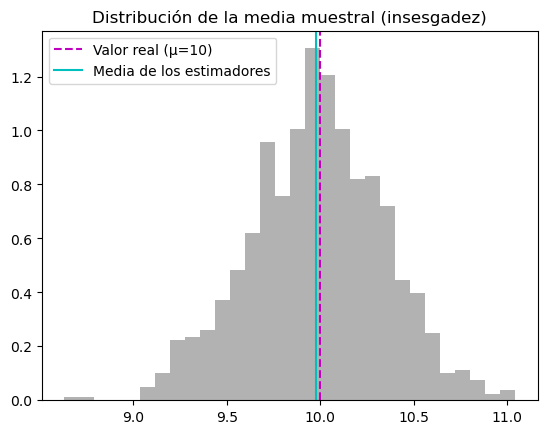

In [24]:
import matplotlib.pyplot as plt

Nsim = 1000
n = 30
estimadores = []

for _ in range(Nsim):
    muestra = np.random.normal(10, 2, size=n)
    estimadores.append(np.mean(muestra))

plt.hist(estimadores, bins=30, density=True, alpha=0.6, color="gray")
plt.axvline(10, color='m', linestyle='--', label="Valor real (μ=10)")
plt.axvline(np.mean(estimadores), color='c', label="Media de los estimadores")
plt.title("Distribución de la media muestral (insesgadez)")
plt.legend()
plt.show()

**Consistencia**
Tomemos como ejemplo la media muestral para una Normal $N(10,2)$

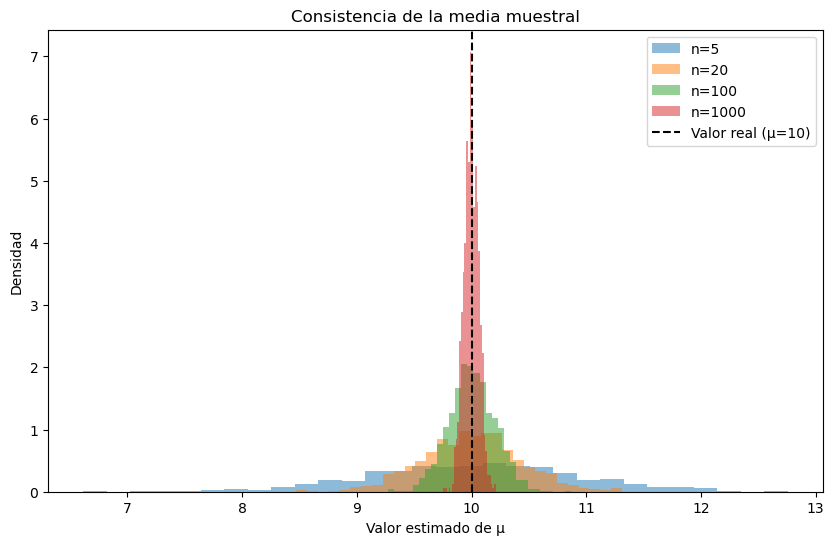

In [20]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
mu, sigma = 10, 2
n_vals = [5, 20, 100, 1000]  # distintos tamaños de muestra

plt.figure(figsize=(10,6))

for n in n_vals:
    estimadores = [np.mean(np.random.normal(mu, sigma, n)) for _ in range(1000)]
    plt.hist(estimadores, bins=30, alpha=0.5, density=True, label=f"n={n}")

plt.axvline(mu, color="black", linestyle="--", label="Valor real (μ=10)")
plt.title("Consistencia de la media muestral")
plt.xlabel("Valor estimado de μ")
plt.ylabel("Densidad")
plt.legend()
plt.show()


- Para muestras pequeñas, la dispersión de los estimadores es grande.
- A medida que $n$ aumenta, las distribuciones se concentran alrededor de $\mu=10$.
- Esto ilustra la consistencia de la media muestral como estimador de $\mu$.

**Eficiencia**
La media de una $Bernoulli(p=0.5)$
- Estimador 1 (media muestral): $\hat{p_1}=\frac{1}{n}\sum X_i\rightarrow Var = \frac{p(1-p)}{n}$
- Estimador 2 (solo el primer dato):$\hat{p_2}=\frac{1}{n}\sum X_i\rightarrow Var =p(1-p)$



In [10]:
import numpy as np

np.random.seed(0)
p = 0.5
n = 30
Nsim = 10000

# Generamos simulaciones
est_media = []
est_uno = []

for _ in range(Nsim):
    muestra = np.random.binomial(1, p, size=n)
    est_media.append(np.mean(muestra))  # estimador 1
    est_uno.append(muestra[0])          # estimador 2

print("Varianza Estimador media muestral:", round(np.var(est_media),6))
print("Varianza Estimador primer dato:", round(np.var(est_uno),6))

Varianza Estimador media muestral: 0.008271
Varianza Estimador primer dato: 0.249981


- Ambos estimadores son insesgados.
- La varianza de la media muestral es mucho menor que la del estimador basado en un solo dato.
- El estimador 1 es mas eficiente que el estimador 2.

## Intervalo de confianza.
Sea $\alpha \in (0,1)$ un número fijo dado. Un **intervalo de confianza** para un parámetro desconocido $\theta$ de una función de distribución de probabilidad es un intervalo aleatorio de la forma $(\hat\theta_1,\hat\theta_2)$, en donde $\hat\theta_1$ y $\hat\theta_2$ son dos estadísticas que satisfacen
$$\mathbb{P}(\hat\theta_1<\theta<\hat\theta_2)=1-\alpha$$
A las estadística $\hat\theta_1$ y $\hat\theta_2$ se les conoce como límites inferior y superior, respectivamente, del intervalo de confianza. Se toma el valor $\alpha$ cercano a cero de tal forma que el grado de confianza, $1-\alpha$, sea cercano a uno. Si se toma $\alpha=0.05$ el grado de confianza será $1-\alpha=0.95$, entonces el grado de confianza es deñ $95%$.

**Ejemplos IC**
- Caso varianza conocida.
Si tenemos una muestra de una Normal con media desconocida $\mu$ y varianza poblacional conocida $\sigma^2$, el intervalo de confianza para la media es:
$$IC=\left[ \bar{X}-z_{\alpha/2}\frac{\sigma}{\sqrt{n}},\bar{X}+z_{\alpha/2}\frac{\sigma}{\sqrt{n}}\right]$$

In [11]:
import numpy as np
import scipy.stats as st

# Datos simulados
np.random.seed(42)
data = np.random.normal(loc=10, scale=2, size=50)

n = len(data)
media = np.mean(data)
sigma = 2  # varianza conocida
alpha = 0.05
z = st.norm.ppf(1 - alpha/2)

li = media - z * sigma / np.sqrt(n)
ls = media + z * sigma / np.sqrt(n)

print(f"Intervalo de confianza 95% (σ conocida): [{li:.2f}, {ls:.2f}]")

Intervalo de confianza 95% (σ conocida): [8.99, 10.10]


- Varianza desconocida.
Si la varianza no es conocida, se sustituye con la desviación estándar muestral $S$ y se usa la distribución $t$ con $n-1$ grados de libertad:
  $$IC=\left[ \bar{X}-z_{t_\alpha/2}n-1\frac{S}{\sqrt{n}},\bar{X}+z_{t_\alpha/2}n-1\frac{S}{\sqrt{n}}\right]$$

In [12]:
s = np.std(data, ddof=1)  # desviación estándar muestral
t = st.t.ppf(1 - alpha/2, df=n-1)

li_t = media - t * s / np.sqrt(n)
ls_t = media + t * s / np.sqrt(n)

print(f"Intervalo de confianza 95% (σ desconocida, t-Student): [{li_t:.2f}, {ls_t:.2f}]")

Intervalo de confianza 95% (σ desconocida, t-Student): [9.02, 10.08]


Podemos graficar la media muestral y su intervalo de confianza.

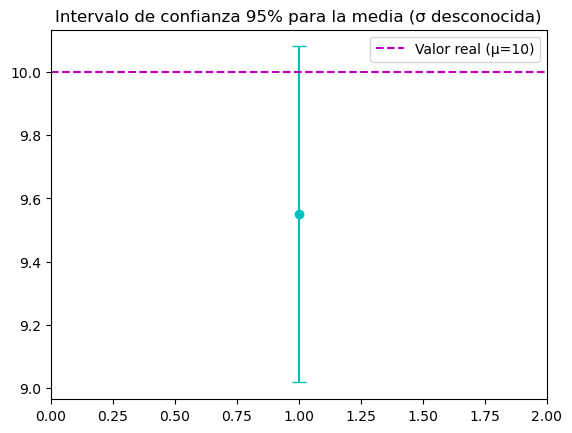

In [17]:
import matplotlib.pyplot as plt

# yerr debe ser [[abajo], [arriba]] para un solo punto
plt.errorbar(
    1, 
    media, 
    yerr=[[media - li_t], [ls_t - media]], 
    fmt='o', 
    color='c', 
    capsize=5
)
plt.axhline(10, color="m", linestyle="--", label="Valor real (μ=10)")
plt.xlim(0,2)
plt.title("Intervalo de confianza 95% para la media (σ desconocida)")
plt.legend()
plt.show()

## Ejemplo Práctico
El siguiente ejemplo práctico esta enfoncado en el área laboral que me desempeño.\\
Supongamos que trabajas en una aseguradora y quieres estimar la prima promedio que los asegurados pagan por un plan de GMM en una población determinada. No podemos revisar todas las pólizas del país, así que tomamos una muestra aleatoria.\\
- Muestra aleatoria:
Seleccionamos $50$ pólizas y encontramos que la prima promedio de la muestra es $12,500$ y la desviación estándar es $1,200$.
- Intervalo de confianza
Queremos un intervalo de confianza del 95% para la prima promedio de toda la población de asegurados.
Usaremos la fórmula $$\bar{x}\pm z \frac{s}{\sqrt{n}}$$
Donde:
- $\bar{x} =12,500$
- $s=1,200$
- $n=50$
Sustituyendo
$$IC=12,500\pm 1.96\frac{1,200}{\sqrt{50}}\approx 12,500\pm 333$$
Con un $95\%$ de confianza, podemos decir que la prima promedio que pagan los asegurados por este plan de GMM se encuentra entre $\$12,167$ y $\$12,833$
Esto es útil para:
- Evaluar si la prima está acorde con el riesgo del grupo.
- Ajustar precios si la prima promedio real está fuera de los límites esperados.
- Informar decisiones de underwriting o repricing en futuras renovaciones.

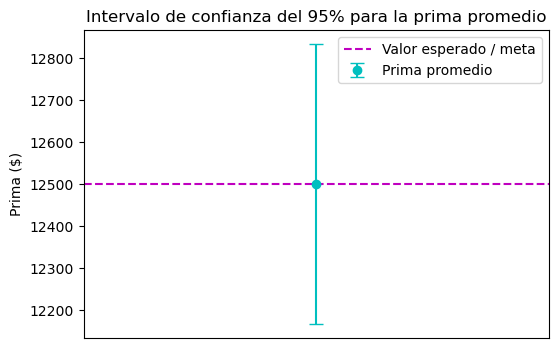

In [26]:
import matplotlib.pyplot as plt

# Datos del ejemplo
media = 12500        # Prima promedio muestral
desviacion = 1200    # Desviación estándar
n = 50               # Tamaño de la muestra
z = 1.96             # Valor z para 95% de confianza

# Calcular margen de error
margen_error = z * (desviacion / (n ** 0.5))

# Intervalo de confianza
li = media - margen_error
ls = media + margen_error

# Crear gráfico
plt.figure(figsize=(6,4))
plt.errorbar(1, media, yerr=[[media - li], [ls - media]], fmt='o', color='c', capsize=5, label='Prima promedio')
plt.axhline(12500, color="m", linestyle="--", label="Valor esperado / meta")
plt.xlim(0.5, 1.5)
plt.xticks([])
plt.ylabel("Prima ($)")
plt.title("Intervalo de confianza del 95% para la prima promedio")
plt.legend()
plt.show()